In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [2]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
df_pre = pd.read_csv('data/SuperRuleData220807.csv', header=0)
df = df_pre.sample(frac=1)

In [4]:
df_pre

,KILLSTANDARDIZED,PLACE STANDARDIZED,RANK
0,1.298894,1.495066,1
1,1.517655,0.815490,2
2,1.517655,-0.135915,3
3,0.751991,0.543660,4
4,0.533230,0.815490,5
...,...,...,...
1035,-0.404703,-0.487114,12
1036,-1.032898,-0.487114,13
1037,-0.694639,-0.593879,14
1038,-1.177866,-1.554762,15


In [5]:
#df

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 631 to 684
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   KILLSTANDARDIZED    1040 non-null   float64
 1   PLACE STANDARDIZED  1040 non-null   float64
 2   RANK                1040 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 32.5 KB


In [7]:
dataset = df.values
X = dataset[:,0:2]
Y = dataset[:,2]

In [8]:
X[:10]

array([[-0.03263437,  0.73950997],
       [-0.32935982, -0.16681996],
       [-0.95282066, -0.74535599],
       [-1.87195721, -1.59766111],
       [-0.03610948, -0.58176254],
       [ 1.26457741,  0.79406303],
       [ 0.4694232 ,  0.11635251],
       [-0.49358403, -0.4871143 ],
       [-0.60929845,  0.43605142],
       [-1.41080106, -0.5134899 ]])

In [9]:
Y[:10]

array([ 8.,  8., 13., 16.,  8.,  4.,  4., 11., 12., 15.])

In [10]:
e = LabelEncoder()
e.fit(Y)
Y_trans = e.transform(Y)
Y_encoded = np_utils.to_categorical(Y_trans)

In [11]:
Y_encoded[:3]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]],
      dtype=float32)

In [12]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y_encoded, test_size=0.1, random_state=seed)

In [13]:
len(X_train)

936

In [14]:
X_train[:3]

array([[-0.66995595,  1.76689592],
       [-1.23875296, -0.59387907],
       [-0.18246146, -0.4871143 ]])

In [15]:
X_train[0].shape

(2,)

In [16]:
Y_train[:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]],
      dtype=float32)

In [17]:
Y_train[0].shape

(16,)

In [18]:
#model = Sequential()
#model.add(Dense(16, input_dim=2, activation='sigmoid'))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(16, activation='softmax'))

In [19]:
model = Sequential([
                    Flatten(input_shape=(2,)),
                    Dense(16, activation='sigmoid', name="layer1"),
                    Dense(32, activation='relu', name="layer2"),
                    Dense(16, activation='softmax', name="layer3")
                    ])

Metal device set to: Apple M1


2022-08-08 13:25:02.832009: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-08 13:25:02.832237: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 layer1 (Dense)              (None, 16)                48        
                                                                 
 layer2 (Dense)              (None, 32)                544       
                                                                 
 layer3 (Dense)              (None, 16)                528       
                                                                 
Total params: 1,120
Trainable params: 1,120
Non-trainable params: 0
_________________________________________________________________


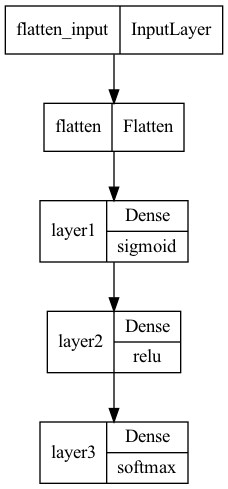

In [21]:
plot_model(model, show_layer_activations=True, to_file='model/model.png')

In [22]:
checkpoint_path = "model/checkpoint.h5"

checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=2
                            )

In [23]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])

In [24]:
history = model.fit(X_train, Y_train, 
                    validation_data=(X_valid, Y_valid), 
                    epochs=500, 
                    batch_size=2,
                    callbacks=[checkpoint])

2022-08-08 13:25:21.723287: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-08 13:25:21.849437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500
461/468 [============================>.] - ETA: 0s - loss: 2.6811 - acc: 0.1095

2022-08-08 13:25:24.515172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_loss improved from inf to 2.49736, saving model to model/checkpoint.h5
468/468 [==============================] - 3s 6ms/step - loss: 2.6790 - acc: 0.1090 - val_loss: 2.4974 - val_acc: 0.2019
Epoch 2/500
462/468 [============================>.] - ETA: 0s - loss: 2.2822 - acc: 0.2013
Epoch 00002: val_loss improved from 2.49736 to 2.15273, saving model to model/checkpoint.h5
468/468 [==============================] - 3s 6ms/step - loss: 2.2800 - acc: 0.1998 - val_loss: 2.1527 - val_acc: 0.2115
Epoch 3/500
468/468 [==============================] - ETA: 0s - loss: 1.9718 - acc: 0.2511
Epoch 00003: val_loss improved from 2.15273 to 1.90896, saving model to model/checkpoint.h5
468/468 [==============================] - 3s 6ms/step - loss: 1.9718 - acc: 0.2511 - val_loss: 1.9090 - val_acc: 0.2019
Epoch 4/500
468/468 [==============================] - ETA: 0s - loss: 1.8011 - acc: 0.2949
Epoch 00004: val_loss improved from 1.90896 to 1.76769, saving model to model/checkpoint

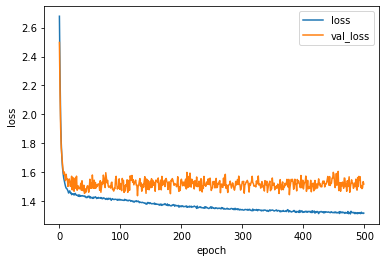

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

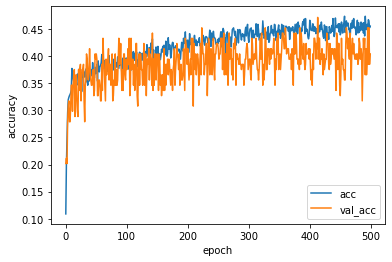

In [26]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'])
plt.show()

In [27]:
# weigh save
model.save_weights('weights/prediction_model_weighs.h5')

In [28]:
# save model weights once
model.save('model/prediction_model.h5')